# Trapped-ion quantum simulation of excitation transport

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from scipy import constants
import math as m

%matplotlib inline

In [3]:
from qutip.superoperator import liouvillian_ref

$$ \frac{d}{dt}\rho = - \frac{i}{\hbar} [H, \rho] + \mathcal{L}_{diss}(\rho) + \mathcal{L}_{deph}(\rho)$$

Where the Hamiltonian is:
$$ H = H_j + H_{w_{i}}$$
With:
$$ H_J = \hbar \sum_{i<j} J_{ij} \sigma_i^+ \sigma_j^- + H.c$$ ($J_{ij}$ Coupling strengths)
$$ H_{w_i} = \hbar \sum_{i} \omega_i \sigma_i^+ \sigma_i^-$$ ($\hbar \omega_i$ on-site excitation energy)

And the Lindblanian operators:
$$ \mathcal{L}_{diss}(\rho) = \frac{\Gamma}{2} [- \{ \sigma_{i_{sink}}^+ \sigma_{i_{sink}}^-,\rho \} + 2 \sigma_{i_{sink}}^- \rho 
\sigma_{i_{sink}}^+]$$ 
$$ \mathcal{L}_{deph}(\rho) = \sum_i \frac{\gamma_i}{2} [- \{ \sigma_i^+ \sigma_i^-,\rho \} + 2\sigma_i^+\sigma_i^- \rho \sigma_i ^+ \sigma_i^-] $$ 

Liouvillian Dissipator
$$D[a,b]\rho = a \rho b^\dagger -\frac{1}{2}a^\dagger b\rho - \frac{1}{2}\rho a^\dagger b$$

J_ij

power-law approximation for equidistant ions
$$ |J_{ij}| \propto |i-j|^{-\alpha}$$

# Dephasing

In [4]:
def lindblad_dephasing(c):
    cdc = c.dag()*c
    return spre(cdc) * spost(cdc) - 0.5 * spre(cdc) - 0.5 * spost(cdc)

In [35]:
N = 10           # Número de qubits
b = 0.1        # Multiplicador J
alpha = 1       # Hoppping range
i= 6            # i-1 site

h = constants.hbar

### Estado inicial
# Todos los spins en estado |0>
psi_list = []

for n in range(N):
    psi_list.append(basis(2,0))
    
# Spin 3 en estado |1>
psi_list[2] = basis(2,1)
psi0 = tensor(psi_list)


# Tiempo de evolución
tlist = np.linspace(0, 3, 300)

In [36]:
# Construimos los operadores
si = qeye(2)
sm = sigmam()
sp = sigmap()

sm_list = []
sp_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sm
    sm_list.append(tensor(op_list))

    op_list[n] = sp
    sp_list.append(tensor(op_list))
    
# Coupling strengths with the aproximation
J = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if i != j:
            J[i,j]=(abs(i-j))**(alpha)

J_max = J.max()

# construct the hamiltonian
H_j = 0

w = 0.1

for i in range(N):
    for j in range(N):
        if (i<j):
            H_j += J[i,j] * sp_list[i] * sm_list[j]
            H_j += (J[i,j] * sp_list[i] * sm_list[j]).dag()

for i in range(N):
    H_j += w * (sp_list[i] * sm_list[i])
            
L0 = superoperator.liouvillian(H_j)

#L_deph = 0

#for i in range(N):
#    L_deph += 0.0*lindblad_dephasing(sm_list[i])

L_diss = lindblad_dissipator(sm_list[6])
    
L = L0  + L_diss

In [37]:
result = mesolve(L, psi0, tlist, [], [])

KeyboardInterrupt: 

In [ ]:
states = [s * s.dag() for s in result.states]

In [ ]:
sm_sp = []

for i in range(N):
    sm_sp.append(sm_list[i]*sp_list[i])

exp_sz = np.array(expect(states, sm_sp ))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist),exp_sz , label=list(range(1,11,1)))
ax.plot(list(tlist), exp_sz[:,0] + exp_sz[:,1] + exp_sz[:,2]
                        + exp_sz[:,3] + exp_sz[:,4] + exp_sz[:,5] +
        exp_sz[:,6] + exp_sz[:,7] + exp_sz[:,8] + exp_sz[:,9] , label="Sum")


ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(r'\gamma = 0.1 J_max')

Text(0.5, 1.0, '\\gamma = 0.1 J_max')

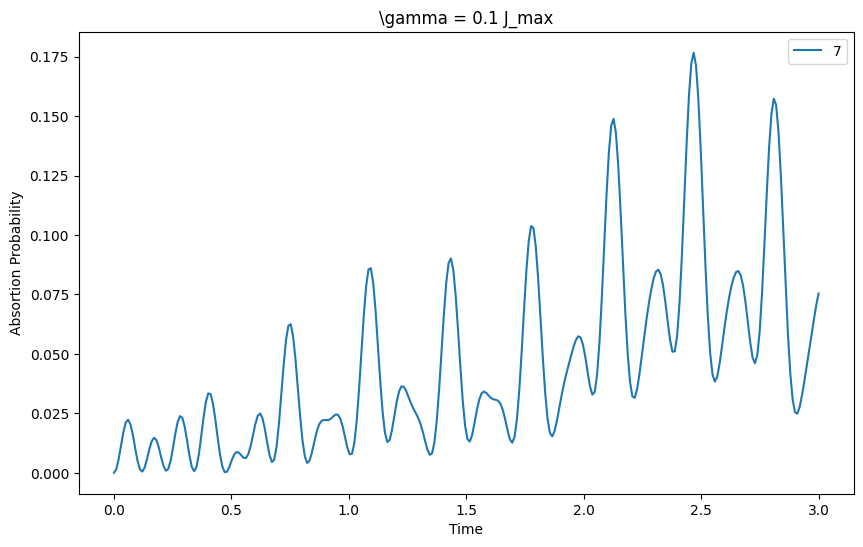

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist),exp_sz[:] , label="7")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(r'\gamma = 0.1 J_max')

ValueError: x and y must have same first dimension, but have shapes (300,) and (10,)

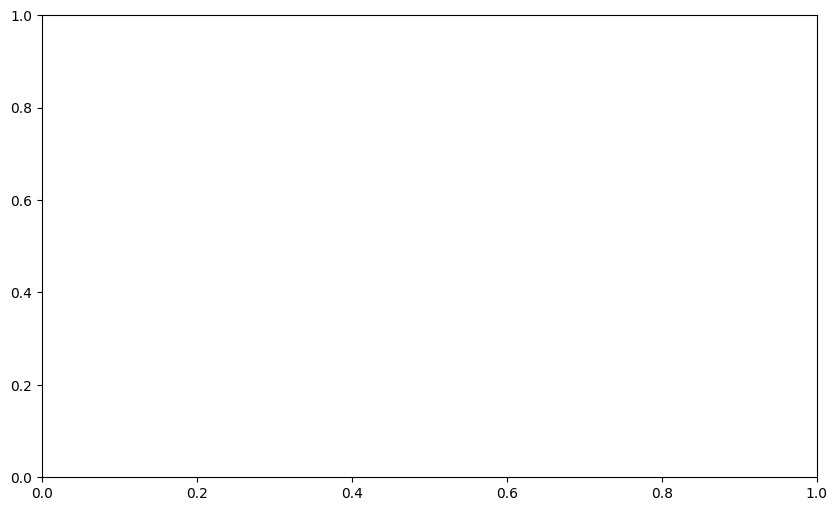

In [22]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist),expect(states, sm_sp) , label=r'0.8')

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(r'\gamma = 0.1 J_max');

In [26]:


exp_sz[1]

array([2.44225520e-05, 9.76769925e-05, 9.79959376e-01, 9.76747096e-05,
       2.44229560e-05, 1.08575306e-05, 1.05789367e-04, 3.91052715e-06,
       2.71453211e-06, 1.99401812e-06])